<a href="https://colab.research.google.com/github/nandinib1999/edureka-assignments/blob/main/Edureka_NLP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Due to time constraints, only used first 2000 rows of the dataset for assignment.

In [58]:
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
df = pd.read_csv("/content/drive/MyDrive/abcnews-date-text.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103663 entries, 0 to 1103662
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1103663 non-null  int64 
 1   headline_text  1103663 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.8+ MB


In [42]:
df.isna().sum()
# Thankfully, there are no null entries in the dataset

publish_date     0
headline_text    0
dtype: int64

In [71]:
print("Original Shape:", df.shape)
df = df.iloc[:2000, :]
print("Subset Selected for this assignment:", df.shape)

Original Shape: (1000, 2)
Subset Selected for this assignment: (1000, 2)


In [72]:
df.head(10)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


In [73]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=set(stopwords.words()),
    max_words=500,
    max_font_size=100, 
    scale=3,
    random_state=1)

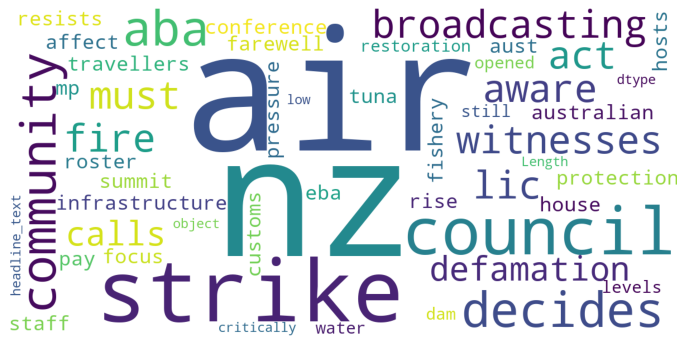

In [74]:
# Generating WordCloud of the text to see prominent words in the corpus
wordcloud=wordcloud.generate(str(df.headline_text))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [75]:
# selecting only headline_text column as we are only concerned with it
data_text = df[['headline_text']]

In [76]:
# preprocessing function
def preprocess(text):
  text = " ".join([word.lower() for word in text.split(' ') if word not in stopwords.words()])
  text = re.sub(r"\'", "", text)
  return text

In [77]:
# Changing the data type to "str" from "object"
data_text = data_text.astype('str')
data_text['headline_text'] = data_text['headline_text'].apply(lambda x: preprocess(x))

In [78]:
data_text.head(10)

,headline_text
0,aba decides community broadcasting licence
1,act fire witnesses must aware defamation
2,g calls infrastructure protection summit
3,air nz staff aust strike pay rise
4,air nz strike affect australian travellers
5,ambitious olsson wins triple jump
6,antic delighted record breaking barca
7,aussie qualifier stosur wastes four memphis match
8,aust addresses security council iraq
9,australia locked timetable


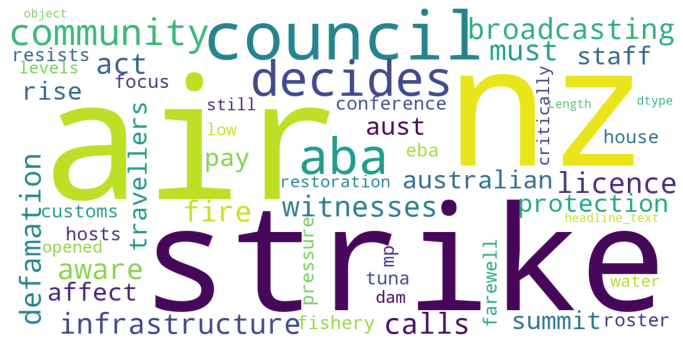

In [79]:
wordcloud=wordcloud.generate(str(data_text.headline_text))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#### Creating DTM

In [80]:
vectorizer = CountVectorizer(max_df= 0.95, min_df=2, max_features=1000, ngram_range=(1,2), stop_words='english')

In [81]:
# Apply it on the data to get the vocabulary and the mapping.
train = vectorizer.fit_transform(data_text.headline_text.values)

In [82]:
train.shape

(1000, 1000)

#### Fit LDA with 5 components

In [83]:
lda = LatentDirichletAllocation(n_components=5, random_state=1).fit(train)

#### Generate the report (CODE PROVIDED)

In [84]:
!pip install mglearn

In [85]:
import mglearn as mg

sorting = np.argsort(lda.components_)[:,::-1]
features = np.array(vectorizer.get_feature_names())
mg.tools.print_topics(topics=range(5), feature_names=features, sorting=sorting, topics_per_chunk=5, n_words=25)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
death         iraq          police        win           new           
defends       council       drought       korean        iraq          
council       plan          rain          rain          warne         
murder        nsw           says          prices        work          
decision      court         charged       water         resolution    
iraqi         govt          court         leads         british       
pm            water         claim         public        probe         
record        calls         wa            subway        nsw           
killed        qantas        injured       funds         says          
raid          campaign      patterson     high          continue      
club          community     group         hit           summit        
planning      set           coast         day           federal       
wheat 